<a href="https://colab.research.google.com/github/diyarrr/ML/blob/main/Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Checking if the dataset needs reshaping
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Since an image 28x28, I want to store it in a 1d array

In [6]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

I am going write a function so that we can see the data visually, And also for a digit

In [41]:
def show_data(X_train):
  # random 64 images
  random_images = np.random.randint(60, size=64)
  fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(5, 5))

  # for every image, there is a subplot
  for i, ax in enumerate(axes.flatten()):
        image = X_train[random_images[i]]
        # in order to see the image properly, I reshaped it
        image = image.reshape(28,28)
        ax.imshow(image, cmap='gray')
        ax.axis('off')

  plt.tight_layout()
  plt.show()

def show_digit(x):
  image = x.reshape(28,28)
  plt.imshow(image, cmap="gray")
  plt.axis("off")
  plt.show()


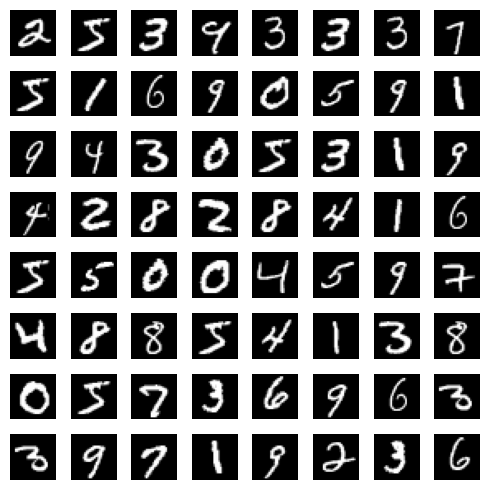

In [29]:
show_data(X_train)

In my model I am going to use two hidden layers and one output layer

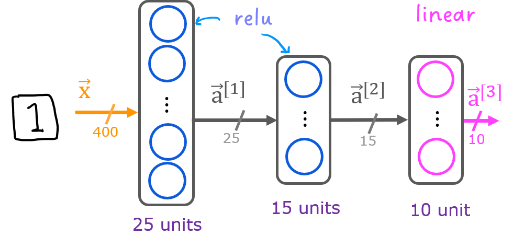

In [82]:
np.random.seed(42)

# model architecture
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)), # this helps model to know what kind of data it is working
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="linear")

])

I created my model, Let's see what kind of features it has

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                19625     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


To facilitate learning in my model, I will employ a loss function and an optimizer called Adam. Unlike the traditional gradient descent algorithm, Adam dynamically adjusts the learning rate during training. By utilizing the loss function, the model aims to minimize the discrepancy between its predictions and the true values. The Adam optimizer optimizes this process by adapting the learning rate based on the magnitude of the gradients. Together, these components contribute to the model's ability to learn and improve its performance over time.

In [37]:
# compile model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# fit model
history = model.fit(
    X_train,y_train,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4789
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5249
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4114
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3562
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3304
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2861
Epoch 8/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2745
Epoch 9/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2547
Epoch 10/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2413
Epoch 11/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2220
Epoch 12/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2144
E

I trained my model, it is time to make a prediction

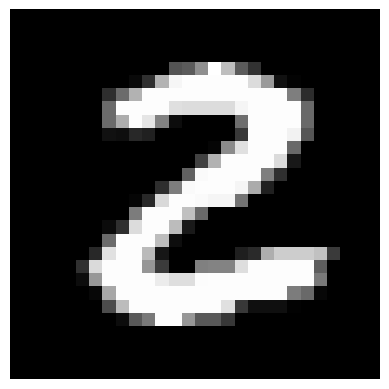

In [45]:
random_choice = X_train[25]
show_digit(random_choice)

In [57]:
# make prediction
prediction = model.predict(random_choice.reshape(1,784))

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 45ms/step
 predicting a Two: 
[[  7.2923083   1.3711145  17.645226    9.069891  -61.616936    4.977358
    1.5346416   8.82602     2.5704596   2.2585573]]
 Largest Prediction index: 2


As you can see, my model gave a vector result and in that vector the largest element is the index 2 element.

I want to use softmax algorithm to make probability distribution. It is similar to rescaling the values. Total of the values must be 1 or very close to 1

In [53]:
prediction_p = tf.nn.softmax(prediction)

print(prediction_p)
print(f"Total: {np.sum(prediction_p)}")

tf.Tensor(
[[3.1887743e-05 8.5522792e-08 9.9962783e-01 1.8863309e-04 3.7732803e-35
  3.1495852e-06 1.0071647e-07 1.4781079e-04 2.8375962e-07 2.0772714e-07]], shape=(1, 10), dtype=float32)
Total: 0.9999999403953552


I want to show 64 samples digits with their predictions to see my model accuracy

In [77]:
def show_data_with_labels(X_train):
    # Random 64 images
    random_images = np.random.randint(0, len(X_train), size=64)
    fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))

    # Make predictions for all images
    predictions = model.predict(X_train[random_images])
    predicted_labels = np.argmax(predictions, axis=1)

    for i, ax in enumerate(axes.flatten()):
        image = X_train[random_images[i]]
        image = image.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        true_label = y_train[random_images[i]]
        predicted_label = predicted_labels[i]
        ax.set_title(f'{true_label}, {predicted_label}')  # Set title for each image

    ax.set_axis_off()
    fig.suptitle("Label, prediction", fontsize=14)
    plt.tight_layout()
    plt.show()



2/2 [==============================] - 0s 8ms/step


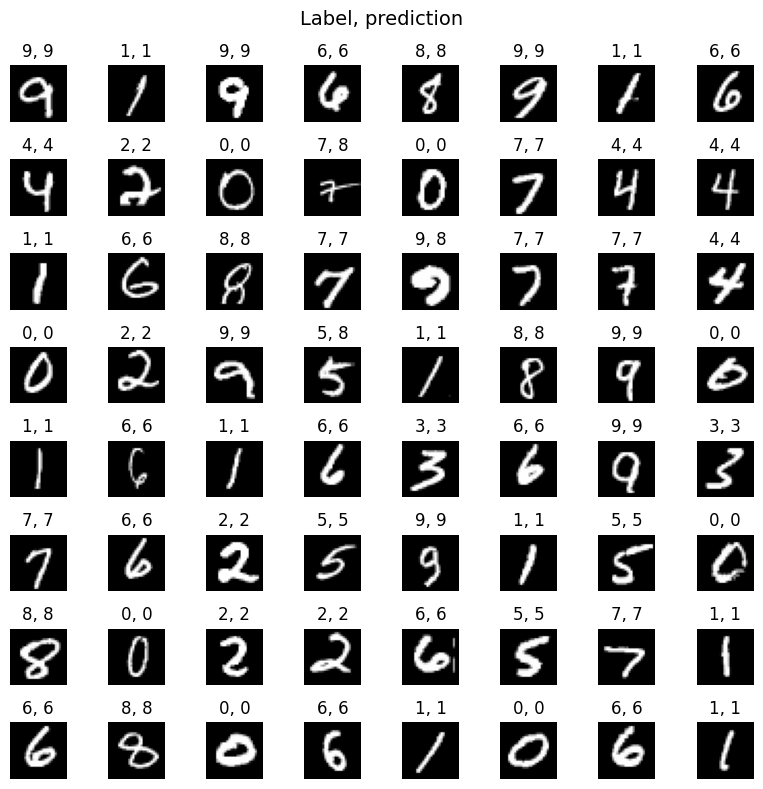

In [78]:
show_data_with_labels(X_train)

I want to see how many errors does my model have in 5000 images

In [79]:
# Make predictions for all images
predictions = model.predict(X_train[:5000])
predicted_labels = np.argmax(predictions, axis=1)

157/157 [==============================] - 0s 2ms/step


In [80]:
# count errors
error = 0
for i in range(5000):
  if(y_train[i] != predicted_labels[i]):
    error += 1

print(f"Number of errors: {error}")

Number of errors: 163


Number of errors could be reduced by increasing number of epochs